In [108]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt 

In [109]:
train = pd.read_excel('DST_BIL54_train.xlsx', index_col=0).T

In [110]:
Y = train['Drivmidler i alt']

In [111]:
X = np.arange(2018, 2018 + len(Y)/12 -1/12,  1/12)

In [112]:
len(X)

59

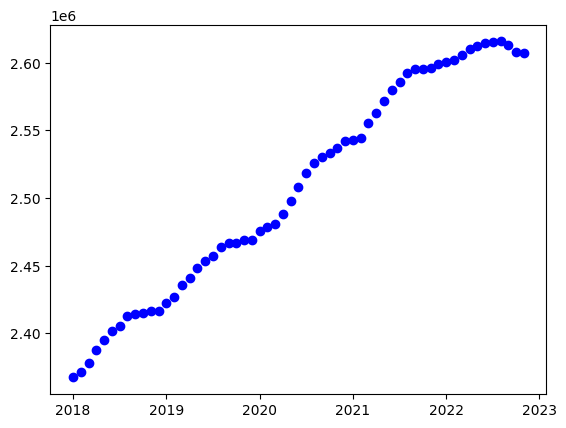

In [113]:
plt.plot(X, Y, 'bo')

In [114]:
x = X

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 2 is different from 59)

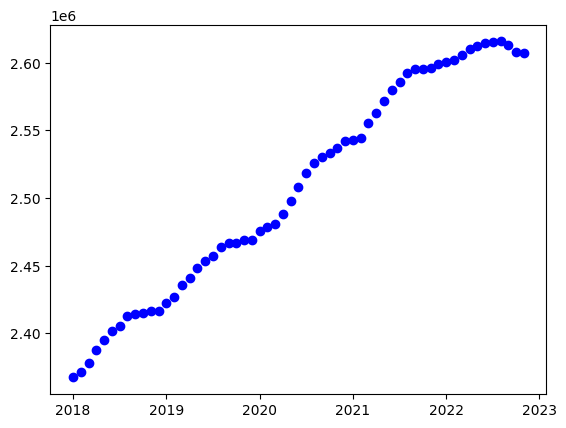

In [115]:
plt.plot(x, Y, 'bo')
plt.plot(x, X @ Theta, '-')




In [116]:
# getting column 
X = np.array(X).reshape(-1,1)
Y = np.array(Y).reshape(-1,1)

In [117]:
X = np.hstack((np.ones((len(X),1)), X))

In [118]:
Theta = np.linalg.inv(X.T @ X) @ X.T @ Y

In [119]:
Theta

array([[-1.09499933e+08],
       [ 5.54377830e+04]])

In [120]:
e = Y - X @ Theta

In [121]:
e2 = e.T @ e

In [122]:
var = e2 / (len(Y)-2)

In [123]:
var 

array([[1.07475954e+08]])

In [124]:
Y.mean()

2507488.0169491526

In [125]:
Var_theta = np.linalg.inv(X.T @ X) * var

In [126]:
se_theta_0 = np.sqrt(Var_theta[0,0])
se_theta_1 = np.sqrt(Var_theta[1,1])

In [127]:
se_theta_0, se_theta_1

(1921555.551097915, 951.0687121138511)

In [128]:
# 3 

next_12 = np.arange(1/12, 1 + 1/12, 1/12)

In [129]:
next_12

array([0.08333333, 0.16666667, 0.25      , 0.33333333, 0.41666667,
       0.5       , 0.58333333, 0.66666667, 0.75      , 0.83333333,
       0.91666667, 1.        ])

In [130]:
# adding the begginging of time
next_12 = next_12 + X[-1][1]

In [131]:
X12 = np.hstack((np.ones(12).reshape(-1,1), next_12.reshape(-1,1)))

In [132]:
X12 @ Theta

array([[2646082.47388972],
       [2650702.28913693],
       [2655322.10438412],
       [2659941.91963132],
       [2664561.73487853],
       [2669181.55012572],
       [2673801.36537291],
       [2678421.18062012],
       [2683040.99586731],
       [2687660.8111145 ],
       [2692280.62636171],
       [2696900.44160891]])

In [133]:
# get t-student value 
from scipy.stats import t

alpha = 0.1


t_value = t.ppf(alpha/2, len(Y)-2) # this is negative but t-student is symmetric 
# -1.9431802803927818

In [134]:
t.ppf(alpha/2, 7-2) 

-2.0150483726691575

In [135]:
X12

array([[1.00000000e+00, 2.02291667e+03],
       [1.00000000e+00, 2.02300000e+03],
       [1.00000000e+00, 2.02308333e+03],
       [1.00000000e+00, 2.02316667e+03],
       [1.00000000e+00, 2.02325000e+03],
       [1.00000000e+00, 2.02333333e+03],
       [1.00000000e+00, 2.02341667e+03],
       [1.00000000e+00, 2.02350000e+03],
       [1.00000000e+00, 2.02358333e+03],
       [1.00000000e+00, 2.02366667e+03],
       [1.00000000e+00, 2.02375000e+03],
       [1.00000000e+00, 2.02383333e+03]])

In [76]:
X12.T @ np.linalg.inv(X.T @ X) @ X12

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 2 is different from 12)

In [137]:
(1 +  X12 @ np.linalg.inv(X.T @ X) @ X12.T)

array([[1.06954997, 1.07130333, 1.07305669, 1.07481005, 1.07656341,
        1.07831677, 1.08007013, 1.08182349, 1.08357686, 1.08533022,
        1.08708358, 1.08883694],
       [1.07130333, 1.07311514, 1.07492694, 1.07673875, 1.07855056,
        1.08036236, 1.08217417, 1.08398597, 1.08579778, 1.08760958,
        1.08942139, 1.0912332 ],
       [1.07305669, 1.07492694, 1.07679719, 1.07866745, 1.0805377 ,
        1.08240795, 1.0842782 , 1.08614845, 1.0880187 , 1.08988895,
        1.09175921, 1.09362946],
       [1.07481005, 1.07673875, 1.07866745, 1.08059614, 1.08252484,
        1.08445354, 1.08638223, 1.08831093, 1.09023963, 1.09216832,
        1.09409702, 1.09602572],
       [1.07656341, 1.07855056, 1.0805377 , 1.08252484, 1.08451198,
        1.08649912, 1.08848627, 1.09047341, 1.09246055, 1.09444769,
        1.09643483, 1.09842198],
       [1.07831677, 1.08036236, 1.08240795, 1.08445354, 1.08649912,
        1.08854471, 1.0905903 , 1.09263589, 1.09468147, 1.09672706,
        1.09877265,

In [138]:
v_es = var *  (1 +  X12 @ np.linalg.inv(X.T @ X) @ X12.T)

In [139]:
confidence =  t_value *  np.sqrt(v_es.diagonal())

In [140]:
X12 @ Theta - confidence.reshape(-1,1),  X12 @ Theta + confidence.reshape(-1,1)

(array([[2664009.15819131],
        [2668658.82638887],
        [2673309.42136255],
        [2677960.93836294],
        [2682613.3725324 ],
        [2687266.71890822],
        [2691920.97242623],
        [2696576.12792397],
        [2701232.1801448 ],
        [2705889.12374055],
        [2710546.95327604],
        [2715205.66323152]]),
 array([[2628155.78958814],
        [2632745.75188499],
        [2637334.7874057 ],
        [2641922.90089969],
        [2646510.09722465],
        [2651096.38134321],
        [2655681.75831959],
        [2660266.23331626],
        [2664849.81158983],
        [2669432.49848846],
        [2674014.29944739],
        [2678595.21998629]]))

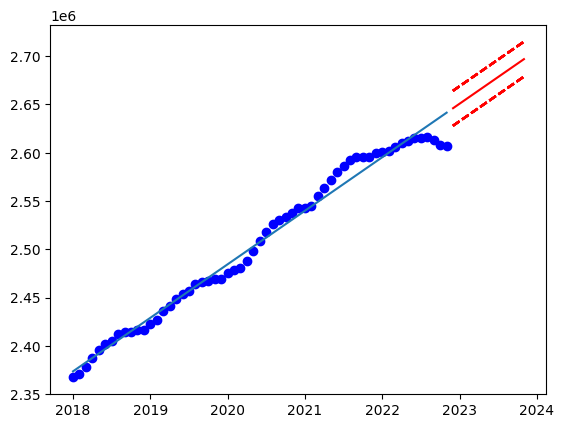

In [141]:
# plot me data with confidence intervals 
plt.plot(x, Y, 'bo')
plt.plot(x, X @ Theta, '-')

plt.plot(X12[:,1], X12 @ Theta, 'r-')
plt.plot(X12[:,1], X12 @ Theta - confidence, 'r--')
plt.plot(X12[:,1], X12 @ Theta + confidence, 'r--')


##################################################################################################################################################################################################################################################################################################################################################################################

In [196]:
L = np.array([[1, 0], [1, 1]])
f_0 = np.array([[1, 0]])          #(3.83)

In [207]:
import numpy as np

#function f(j)...f(0)=np.array (1,0)
def f(j):
    return np.array([1, j])

# Define L and its inverse L_inv
L = np.array([[1, 0], [1, 1]])
L_inv = np.linalg.inv(L)

f_0 = f(0)
f_0t = np.transpose(f_0)
F_i = f_0 @ f_0t
h_i = f_0 * Y[0] 

## (3.94) and (3.95)
F_1 = F_i + f(-1) @ f(-1).T  #f(-1) since we're considering N=0 for the update to N+1=1
h_1 = L_inv @ h_i + f(0) * Y[1]  #Y[1] is second observation (Y[N+1])

print("F_1:", F_1)
print("h_1:", h_1)


F_1: 3
h_1: [ 4738394. -2367154.]


In [208]:
lambda_ = 0.9

## (3.100)
for i in range(1, 10):
    F_i = F_i + lambda_ * f(-1) @ f(-1).T 
    h_i = lambda_ * L_inv @ h_i + f(0) * Y[i]  

F_10 = F_i
h_10 = h_i
print("F_10:\n", F_10)
print("h_10:\n", h_10)

F_10:
 17.200000000000003
h_10:
 [ 15628556.81637141 -56709555.93933485]
